# Data Exploration
Notebook Objective: to understand `data/02_primary` datasets feature frequencies, correlations and visual plots 

## Kedro

In [2]:
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from kedro.io import DataCatalog
    catalog: DataCatalog

In [3]:
%load_ext kedro.ipython

[09/24/25 00:24:58] INFO     Using 'c:\Users\Zeus\Projetos\Projetos DS\Projetos                     __init__.py:270
                             Preditiva\otimizacao-de-ads-para-startup\.venv\Lib\site-packages\kedro                
                             \framework\project\rich_logging.yml' as logging configuration.                        

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: c:\Users\Zeus\Projetos\Projetos DS\Projetos  __init__.py:180
                             Preditiva\otimizacao-de-ads-para-startup.                                             
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/24/25 00:24:59] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:243
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[09/24/25 00:25:00] INFO     Kedro project Otimizacao de Ads para Startup                           __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

[09/24/25 00:25:01] INFO     Registered line magic 'run_viz'                                        __init__.py:153

## Importações de Bibliotecas e base

In [4]:

# Importando as bibliotecas necessárias
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:

# Configurações
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

# Configurando para exibir todas as colunas
pd.set_option("display.max_columns", None) # default is 50
pd.set_option("display.width", None) # default is 80

In [6]:
# A base de perfis será a única utilziada, então irei chamar apenas de df
df = catalog.load("perfis")

[09/24/25 00:25:06] INFO     Loading data from perfis (CSVDataset)...                          data_catalog.py:1046

## Exploração da base

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   faixa_etaria            284 non-null    object 
 1   genero                  284 non-null    object 
 2   categoria_de_interesse  284 non-null    int64  
 3   descricao_da_categoria  284 non-null    object 
 4   perfil                  284 non-null    object 
 5   impressoes              284 non-null    int64  
 6   cliques                 284 non-null    int64  
 7   custo                   284 non-null    float64
 8   vendas                  284 non-null    int64  
 9   faturamento             284 non-null    float64
 10  lucro                   284 non-null    float64
 11  ctr                     284 non-null    float64
 12  tc                      281 non-null    float64
 13  cpc                     281 non-null    float64
 14  cc                      274 non-null    fl

In [34]:
df.head()

,faixa_etaria,genero,categoria_de_interesse,descricao_da_categoria,perfil,impressoes,cliques,custo,vendas,faturamento,lucro,ctr,tc,cpc,cc,roi,conversao
0,30-34,F,2,Business and Industry,30-34 | F | 2,252951,45,67.200000,11,935.0,867.800000,0.000178,0.244444,1.493333,6.109091,12.913690,0.000043
1,30-34,F,7,Business and Industry,30-34 | F | 7,317046,58,84.860000,12,1020.0,935.140000,0.000183,0.206897,1.463103,7.071667,11.019797,0.000038
2,30-34,F,10,Business and Industry,30-34 | F | 10,604070,91,129.580000,28,2380.0,2250.420000,0.000151,0.307692,1.423956,4.627857,17.367032,0.000046
3,30-34,F,15,Business and Industry,30-34 | F | 15,1669161,262,391.600002,46,3910.0,3518.399998,0.000157,0.175573,1.494656,8.513044,8.984678,0.000028
4,30-34,F,16,Entertainment,30-34 | F | 16,2693782,355,529.709996,62,5270.0,4740.290004,0.000132,0.174648,1.492141,8.543710,8.948840,0.000023


In [8]:
categoricas = ["faixa_etaria", "genero", "categoria_de_interesse", "descricao_da_categoria", "perfil"]
df[categoricas] = df[categoricas].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   faixa_etaria            284 non-null    category
 1   genero                  284 non-null    category
 2   categoria_de_interesse  284 non-null    category
 3   descricao_da_categoria  284 non-null    category
 4   perfil                  284 non-null    category
 5   impressoes              284 non-null    int64   
 6   cliques                 284 non-null    int64   
 7   custo                   284 non-null    float64 
 8   vendas                  284 non-null    int64   
 9   faturamento             284 non-null    float64 
 10  lucro                   284 non-null    float64 
 11  ctr                     284 non-null    float64 
 12  tc                      281 non-null    float64 
 13  cpc                     281 non-null    float64 
 14  cc                      27

In [19]:
def full_describe(df) -> None:
    display(df.info())
    display(df.describe(include=["object", "category"]).T.style.set_caption("<b>Describe de Categóricas</b>"))
    display(df.describe(include="number").T.style.set_caption("<b>Describe de Numéricas</b>"))
    display(df.head().style.set_caption("<b>Head</b>"))

from IPython.display import Markdown
def value_counts(df) -> None:
    display(Markdown("#### VALORES ÚNICOS"))

    for col in df.select_dtypes(include=["object", "category"]).columns:

        counts = df[col].value_counts()
        percents = df[col].value_counts(normalize=True).mul(100).round(2)

        summary = (
            pd.DataFrame({"qtd": counts, "percentual": percents})
            .sort_values("qtd", ascending=False)
        )
        summary.index.name = None

        display(
            summary.style
                .format({"percentual": "{:.2f}"})
                .set_caption(f"{col}")
                .set_table_styles([{
                    "selector": "caption",
                    "props": [("text-align", "left"), ("font-size", "19px"), ("font-weight", "bold")]
                }])
        )


In [20]:
full_describe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   faixa_etaria            284 non-null    category
 1   genero                  284 non-null    category
 2   categoria_de_interesse  284 non-null    category
 3   descricao_da_categoria  284 non-null    category
 4   perfil                  284 non-null    category
 5   impressoes              284 non-null    int64   
 6   cliques                 284 non-null    int64   
 7   custo                   284 non-null    float64 
 8   vendas                  284 non-null    int64   
 9   faturamento             284 non-null    float64 
 10  lucro                   284 non-null    float64 
 11  ctr                     284 non-null    float64 
 12  tc                      281 non-null    float64 
 13  cpc                     281 non-null    float64 
 14  cc                      27

,count,unique,top,freq
faixa_etaria,284,4,30-34,72
genero,284,2,F,144
categoria_de_interesse,284,40,15,8
descricao_da_categoria,284,9,Technology,53
perfil,284,284,30-34 | F | 10,1


,count,mean,std,min,25%,50%,75%,max
impressoes,284.000000,751531.084507,1001406.301450,652.000000,128798.250000,373766.000000,866792.750000,6110946.000000
cliques,284.000000,134.383803,187.275361,0.000000,20.000000,65.000000,166.250000,1321.000000
custo,284.000000,206.708556,286.107323,0.000000,30.215000,103.120001,247.794998,1888.630003
vendas,284.000000,23.971831,27.153261,0.000000,7.750000,13.000000,32.250000,176.000000
faturamento,284.000000,2037.605634,2308.027145,0.000000,658.750000,1105.000000,2741.250000,14960.000000
lucro,284.000000,1830.897078,2136.180396,-120.899998,513.810001,990.600000,2517.775001,14003.090003
ctr,284.000000,0.000173,0.000065,0.000000,0.000132,0.000166,0.000213,0.000439
tc,281.000000,0.535443,1.099989,0.000000,0.100000,0.250000,0.510638,11.000000
cpc,281.000000,1.517036,0.155152,0.655000,1.424706,1.478545,1.617447,1.996250
cc,274.000000,10.985160,12.861269,0.135455,2.903248,6.133295,14.008686,86.940002


,faixa_etaria,genero,categoria_de_interesse,descricao_da_categoria,perfil,impressoes,cliques,custo,vendas,faturamento,lucro,ctr,tc,cpc,cc,roi,conversao
0,30-34,F,2,Business and Industry,30-34 | F | 2,252951,45,67.200000,11,935.000000,867.800000,0.000178,0.244444,1.493333,6.109091,12.913690,0.000043
1,30-34,F,7,Business and Industry,30-34 | F | 7,317046,58,84.860000,12,1020.000000,935.140000,0.000183,0.206897,1.463103,7.071667,11.019797,0.000038
2,30-34,F,10,Business and Industry,30-34 | F | 10,604070,91,129.580000,28,2380.000000,2250.420000,0.000151,0.307692,1.423956,4.627857,17.367032,0.000046
3,30-34,F,15,Business and Industry,30-34 | F | 15,1669161,262,391.600002,46,3910.000000,3518.399998,0.000157,0.175573,1.494656,8.513044,8.984678,0.000028
4,30-34,F,16,Entertainment,30-34 | F | 16,2693782,355,529.709996,62,5270.000000,4740.290004,0.000132,0.174648,1.492141,8.543710,8.948840,0.000023


Temos que nos atentar aos valores infinitos gerados em cc por conta da divisão por zero. Vou substituir por nulo 

In [18]:
value_counts(df.drop(columns=["perfil"]))

### VALORES ÚNICOS

,qtd,percentual
30-34,72,25.35
40-44,72,25.35
35-39,71,25.00
45-49,69,24.30


,qtd,percentual
F,144,50.70
M,140,49.30


,qtd,percentual
15,8,2.82
10,8,2.82
19,8,2.82
16,8,2.82
20,8,2.82
23,8,2.82
22,8,2.82
21,8,2.82
64,8,2.82
63,8,2.82


,qtd,percentual
Technology,53,18.66
Fitness and wellness,31,10.92
Entertainment,31,10.92
Family and relationships,31,10.92
Business and Industry,30,10.56
Food and drink,30,10.56
Hobbies and activities,30,10.56
Shopping and fashion,26,9.15
Sports and outdoors,22,7.75


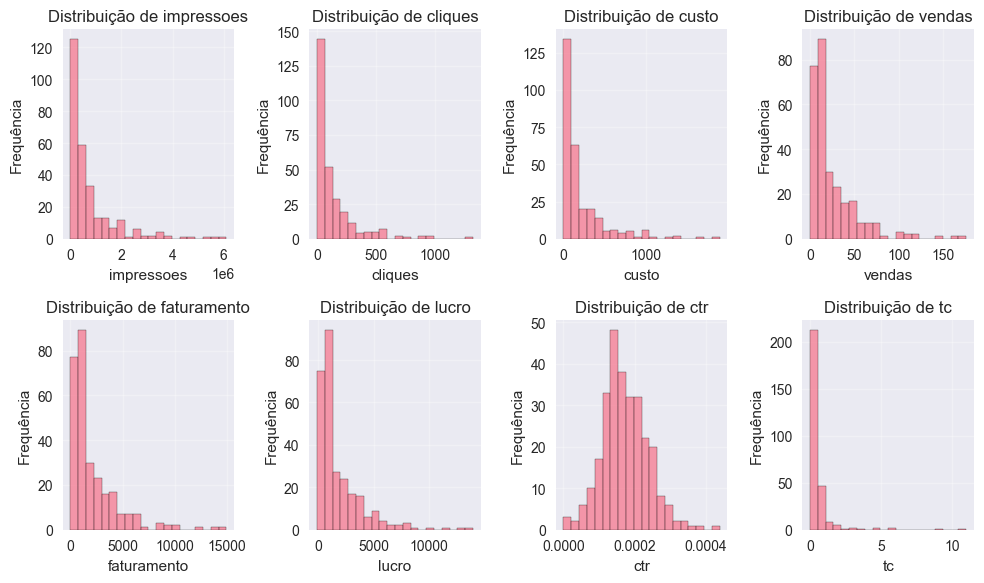

In [22]:
# Identificando colunas quantitativas
colunas_quantitativas = df.select_dtypes(include=[np.number]).columns

# Criando histogramas
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
axes = axes.ravel()

for i, coluna in enumerate(colunas_quantitativas):
    if i < 8:  # Limitando a 8 gráficos
        axes[i].hist(df[coluna], bins=20, alpha=0.7, edgecolor="black")
        axes[i].set_title(f"Distribuição de {coluna}")
        axes[i].set_xlabel(coluna)
        axes[i].set_ylabel("Frequência")
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

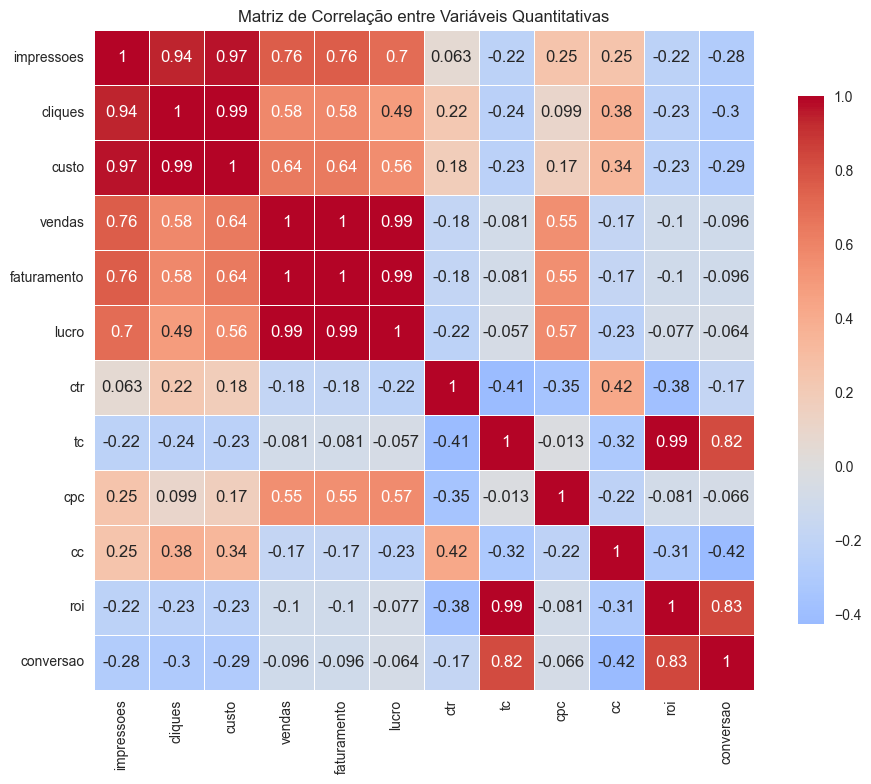

In [27]:
# Matriz de correlação
correlacao = df[colunas_quantitativas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação entre Variáveis Quantitativas")
plt.tight_layout()
plt.show()

In [ ]:
correlacoes = []
for i in range(len(correlacao.columns)):
    for j in range(i+1, len(correlacao.columns)):
        correlacoes.append((
            correlacao.columns[i],
            correlacao.columns[j],
            correlacao.iloc[i, j]
        ))

correlacoes_df = pd.DataFrame(correlacoes, columns=["Variável 1", "Variável 2", "Correlação"])
correlacoes_df = correlacoes_df.sort_values("Correlação", key=abs, ascending=False)
display(correlacoes_df.head(15).round(3))


,Variável 1,Variável 2,Correlação
30,vendas,faturamento,1.000
31,vendas,lucro,0.995
38,faturamento,lucro,0.995
11,cliques,custo,0.993
58,tc,roi,0.993
1,impressoes,custo,0.967
0,impressoes,cliques,0.942
65,roi,conversao,0.834
59,tc,conversao,0.818
3,impressoes,faturamento,0.765


### Roi

=== ANÁLISE DE ROI POR SEGMENTAÇÃO ===


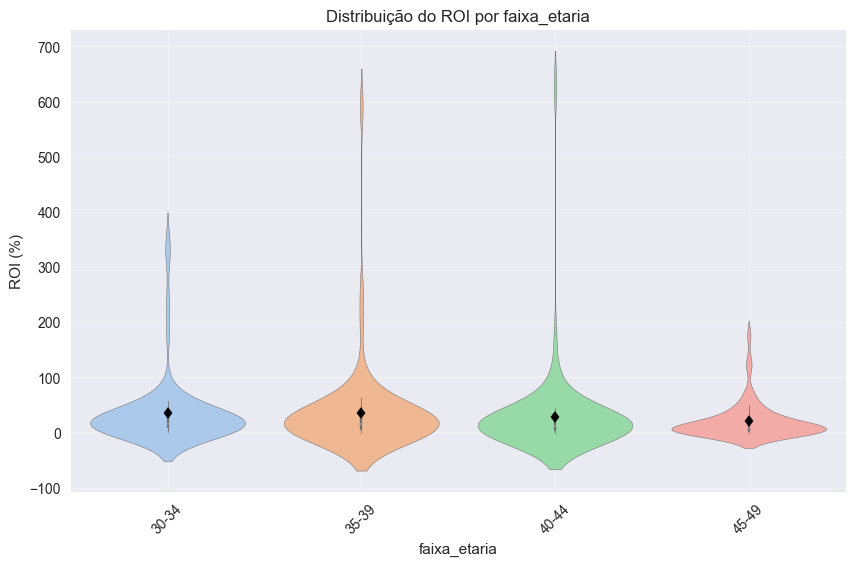

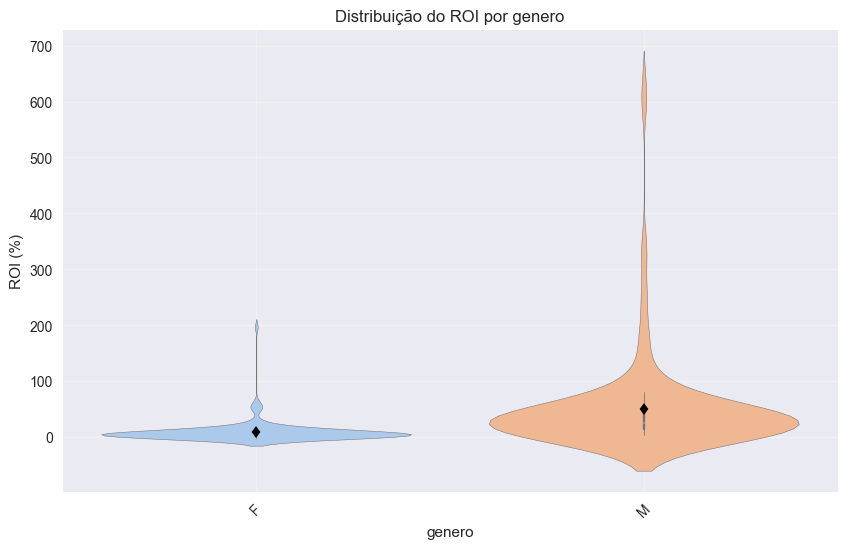

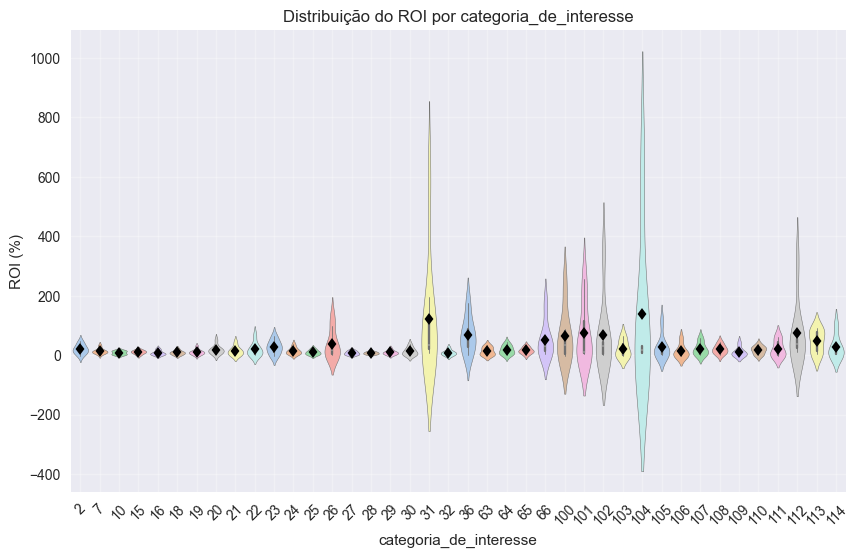

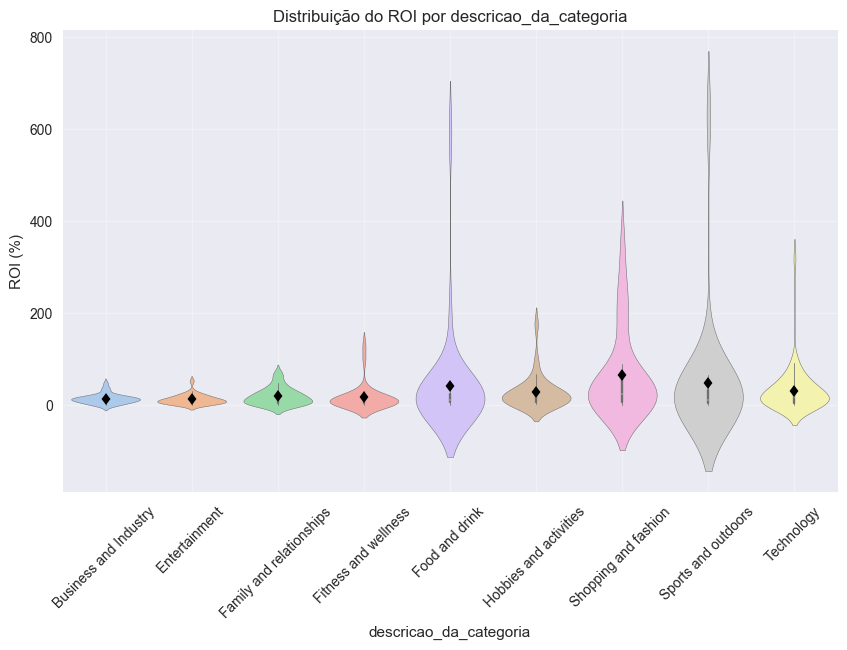

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_qualitativas = df.drop(columns=["perfil"]).select_dtypes(include=["object", "category"]).columns.tolist()

print("=== ANÁLISE DE ROI POR SEGMENTAÇÃO ===")

for coluna_qual in colunas_qualitativas:
    roi_por_grupo = df.groupby(coluna_qual)["roi"].agg(["mean", "std", "count"]).round(2)
    roi_por_grupo.columns = ["ROI Médio (%)", "Desvio Padrão", "Quantidade"]
    
    # Gráfico de violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=coluna_qual, y="roi", data=df, inner="box", palette="pastel")
    sns.pointplot(x=coluna_qual, y="ROI Médio (%)", data=roi_por_grupo.reset_index(), 
                  color="black", join=False, markers="d", scale=0.7)
    plt.title(f"Distribuição do ROI por {coluna_qual}")
    plt.ylabel("ROI (%)")
    plt.xlabel(coluna_qual)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()


In [36]:
print("=== FUNIL DE VENDAS GERAL ===")

VALOR_VENDA = 85.00
total_impressoes = df["impressoes"].sum()
total_cliques = df["cliques"].sum()
total_vendas = df["vendas"].sum()
total_custo = df["custo"].sum()

ctr_geral = (total_cliques / total_impressoes) * 100
tc_geral = (total_vendas / total_cliques) * 100
roi_geral = ((total_vendas * VALOR_VENDA - total_custo) / total_custo) * 100

print(f"Total de Impressões: {total_impressoes:,}")
print(f"Total de Cliques: {total_cliques:,}")
print(f"Total de Vendas: {total_vendas:,}")
print(f"CTR Geral: {ctr_geral:.2f}%")
print(f"Taxa de Conversão Geral: {tc_geral:.2f}%")
print(f"ROI Geral: {roi_geral:.2f}%")
print(f"Custo Total: R$ {total_custo:,.2f}")
print(f"Faturamento Total: R$ {total_vendas * VALOR_VENDA:,.2f}")
print(f"Lucro Total: R$ {total_vendas * VALOR_VENDA - total_custo:,.2f}")

=== FUNIL DE VENDAS GERAL ===
Total de Impressões: 213,434,828
Total de Cliques: 38,165
Total de Vendas: 6,808
CTR Geral: 0.02%
Taxa de Conversão Geral: 17.84%
ROI Geral: 885.74%
Custo Total: R$ 58,705.23
Faturamento Total: R$ 578,680.00
Lucro Total: R$ 519,974.77


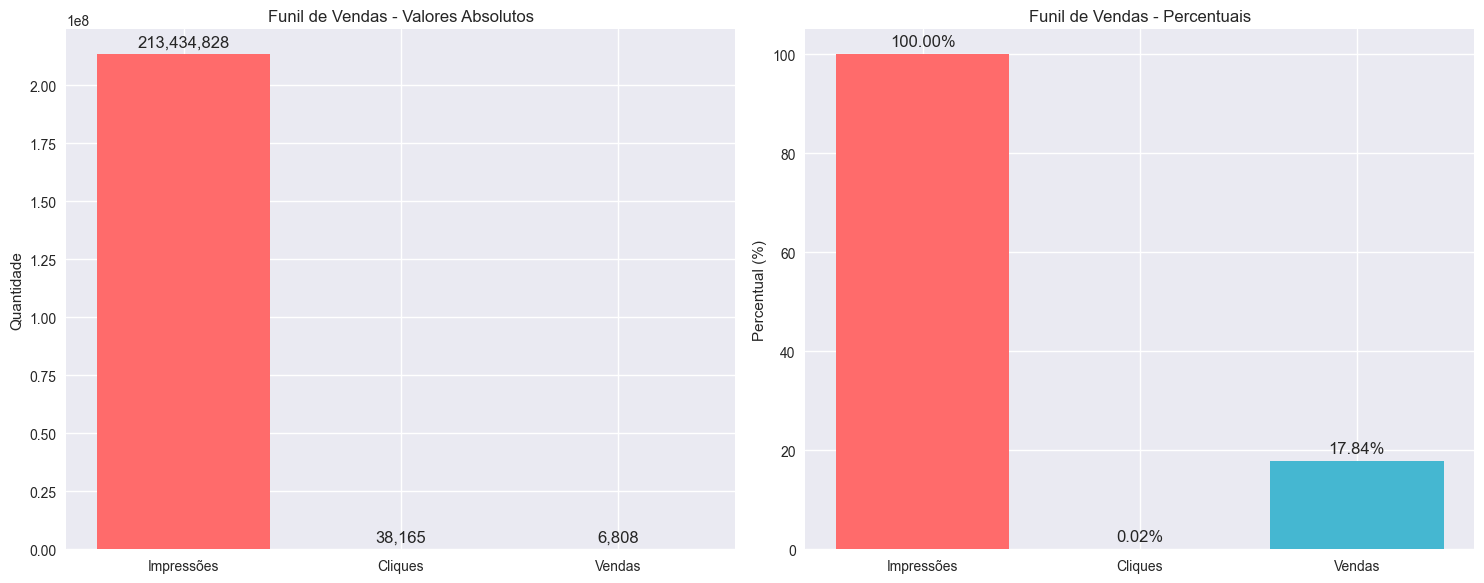

In [37]:

# Visualizando o funil de vendas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras do funil
etapas = ["Impressões", "Cliques", "Vendas"]
valores = [total_impressoes, total_cliques, total_vendas]
percentuais = [100, ctr_geral, tc_geral]

ax1.bar(etapas, valores, color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
ax1.set_title("Funil de Vendas - Valores Absolutos")
ax1.set_ylabel("Quantidade")
for i, v in enumerate(valores):
    ax1.text(i, v + max(valores)*0.01, f"{v:,}", ha="center", va="bottom")

# Gráfico de percentuais
ax2.bar(etapas, percentuais, color=["#FF6B6B", "#4ECDC4", "#45B7D1"])
ax2.set_title("Funil de Vendas - Percentuais")
ax2.set_ylabel("Percentual (%)")
for i, v in enumerate(percentuais):
    ax2.text(i, v + 1, f"{v:.2f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


#### melhores perfis ROI

In [ ]:

# Identificando os melhores perfis baseado no ROI
melhores_perfis = (
    df.groupby(
        ["faixa_etaria", "sexo", "descricao_da_categoria"],
        observed=True
        )
        .agg({
            "roi": "mean",
            "custo": "mean",
            "vendas": "mean",
            "ctr": "mean",
            "tc": "mean"
        })
        .round(2)
)

In [54]:

melhores_perfis = melhores_perfis.sort_values("roi", ascending=False)
print("Melhores perfis baseado no ROI:")
display(melhores_perfis.head(10))

Melhores perfis baseado no ROI:


roi   custo  vendas  ctr    tc
faixa_etaria sexo descricao_da_categoria                                    
40-44        M    Sports and outdoors      236.83   15.04   10.33  0.0  4.18
30-34        M    Shopping and fashion     195.32   37.58   16.25  0.0  3.39
35-39        M    Food and drink           163.50  211.89   41.00  0.0  2.59
                  Shopping and fashion     114.10   19.79   13.00  0.0  2.04
40-44        M    Shopping and fashion     104.00   12.15   13.67  0.0  1.84
30-34        M    Technology                94.98   31.02   15.20  0.0  1.73
45-49        M    Sports and outdoors       74.49   18.67   11.00  0.0  1.30
                  Hobbies and activities    68.74   38.75   15.50  0.0  1.28
35-39        M    Technology                55.24   19.82   10.43  0.0  0.97
             F    Food and drink            52.67  123.39   11.50  0.0  0.57

In [56]:
VERBA_TOTAL = 20000

# Sugestão de alocação baseada no ROI
print(f"\n=== SUGESTÃO DE ALOCAÇÃO DA VERBA DE R$ {VERBA_TOTAL:,.2f} ===")

# Alocando mais verba para perfis com maior ROI
top_perfis = melhores_perfis.head(5)
total_roi_top = top_perfis["roi"].sum()

for i, (perfil, dados) in enumerate(top_perfis.iterrows()):
    # Alocação proporcional ao ROI
    alocacao = (dados["roi"] / total_roi_top) * VERBA_TOTAL
    print(f"\nPerfil {i+1}: {perfil}")
    print(f"  ROI médio: {dados['roi']:.2f}%")
    print(f"  Alocação sugerida: R$ {alocacao:,.2f}")
    print(f"  Vendas esperadas: {alocacao / dados['custo'] * dados['vendas']:.0f}")
    print(f"  Lucro esperado: R$ {alocacao / dados['custo'] * dados['vendas'] * VALOR_VENDA - alocacao:,.2f}")

print("\n=== ANÁLISE CONCLUÍDA ===")
print("Principais descobertas e recomendações foram apresentadas acima.")
print("Considere implementar as sugestões de alocação da verba para maximizar o ROI.")



=== SUGESTÃO DE ALOCAÇÃO DA VERBA DE R$ 20,000.00 ===

Perfil 1: ('40-44', 'M', 'Sports and outdoors ')
  ROI médio: 236.83%
  Alocação sugerida: R$ 5,820.71
  Vendas esperadas: 3998
  Lucro esperado: R$ 333,997.87

Perfil 2: ('30-34', 'M', 'Shopping and fashion ')
  ROI médio: 195.32%
  Alocação sugerida: R$ 4,800.49
  Vendas esperadas: 2076
  Lucro esperado: R$ 171,641.20

Perfil 3: ('35-39', 'M', 'Food and drink ')
  ROI médio: 163.50%
  Alocação sugerida: R$ 4,018.43
  Vendas esperadas: 778
  Lucro esperado: R$ 62,073.59

Perfil 4: ('35-39', 'M', 'Shopping and fashion ')
  ROI médio: 114.10%
  Alocação sugerida: R$ 2,804.30
  Vendas esperadas: 1842
  Lucro esperado: R$ 153,777.44

Perfil 5: ('40-44', 'M', 'Shopping and fashion ')
  ROI médio: 104.00%
  Alocação sugerida: R$ 2,556.07
  Vendas esperadas: 2876
  Lucro esperado: R$ 241,890.25

=== ANÁLISE CONCLUÍDA ===
Principais descobertas e recomendações foram apresentadas acima.
Considere implementar as sugestões de alocação da ve